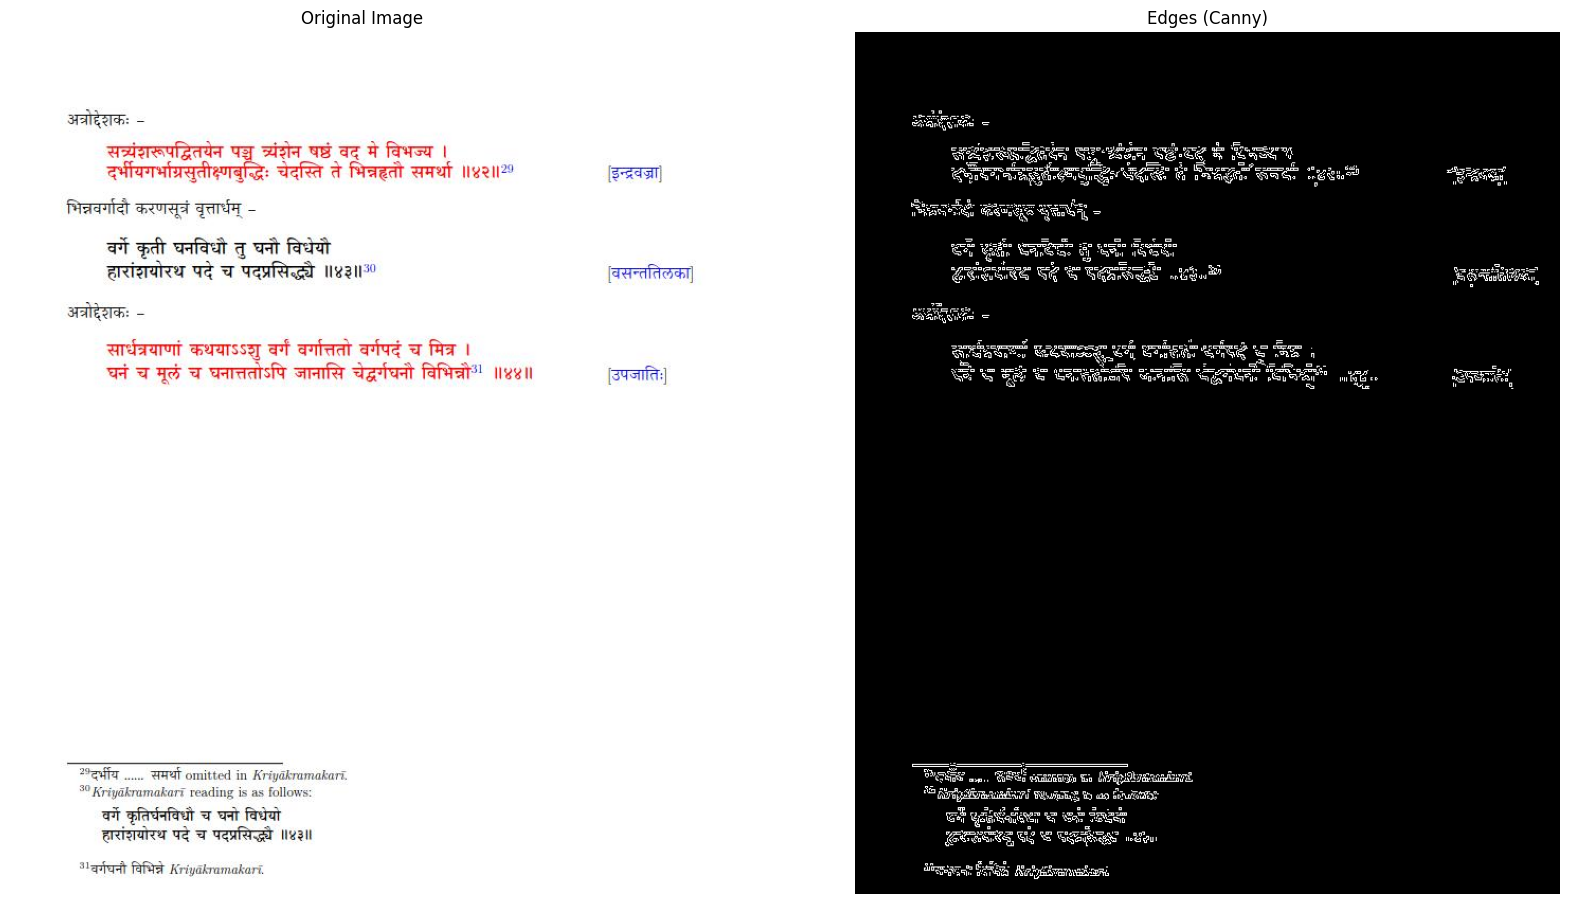

In [8]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load image
img_path = '/home/kalyan/gitrepo/NeedToStartARepo/iitb/test.jpg'
img = cv2.imread(img_path)

# Create Gabor filter bank
gabor_kernels = cv2.getGaborKernel((5, 5), 4.0, theta=0, lambd=10.0, gamma=0.5)

# Filter image with Gabor filters
gabor_imgs = []
for kernel in gabor_kernels:
    filtered_img = cv2.filter2D(img, -1, kernel)
    gabor_imgs.append(filtered_img)

# Detect edges
edges = cv2.Canny(gabor_imgs[0], 50, 200)

# Plot the image
plt.figure(figsize=(20, 52))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.show()


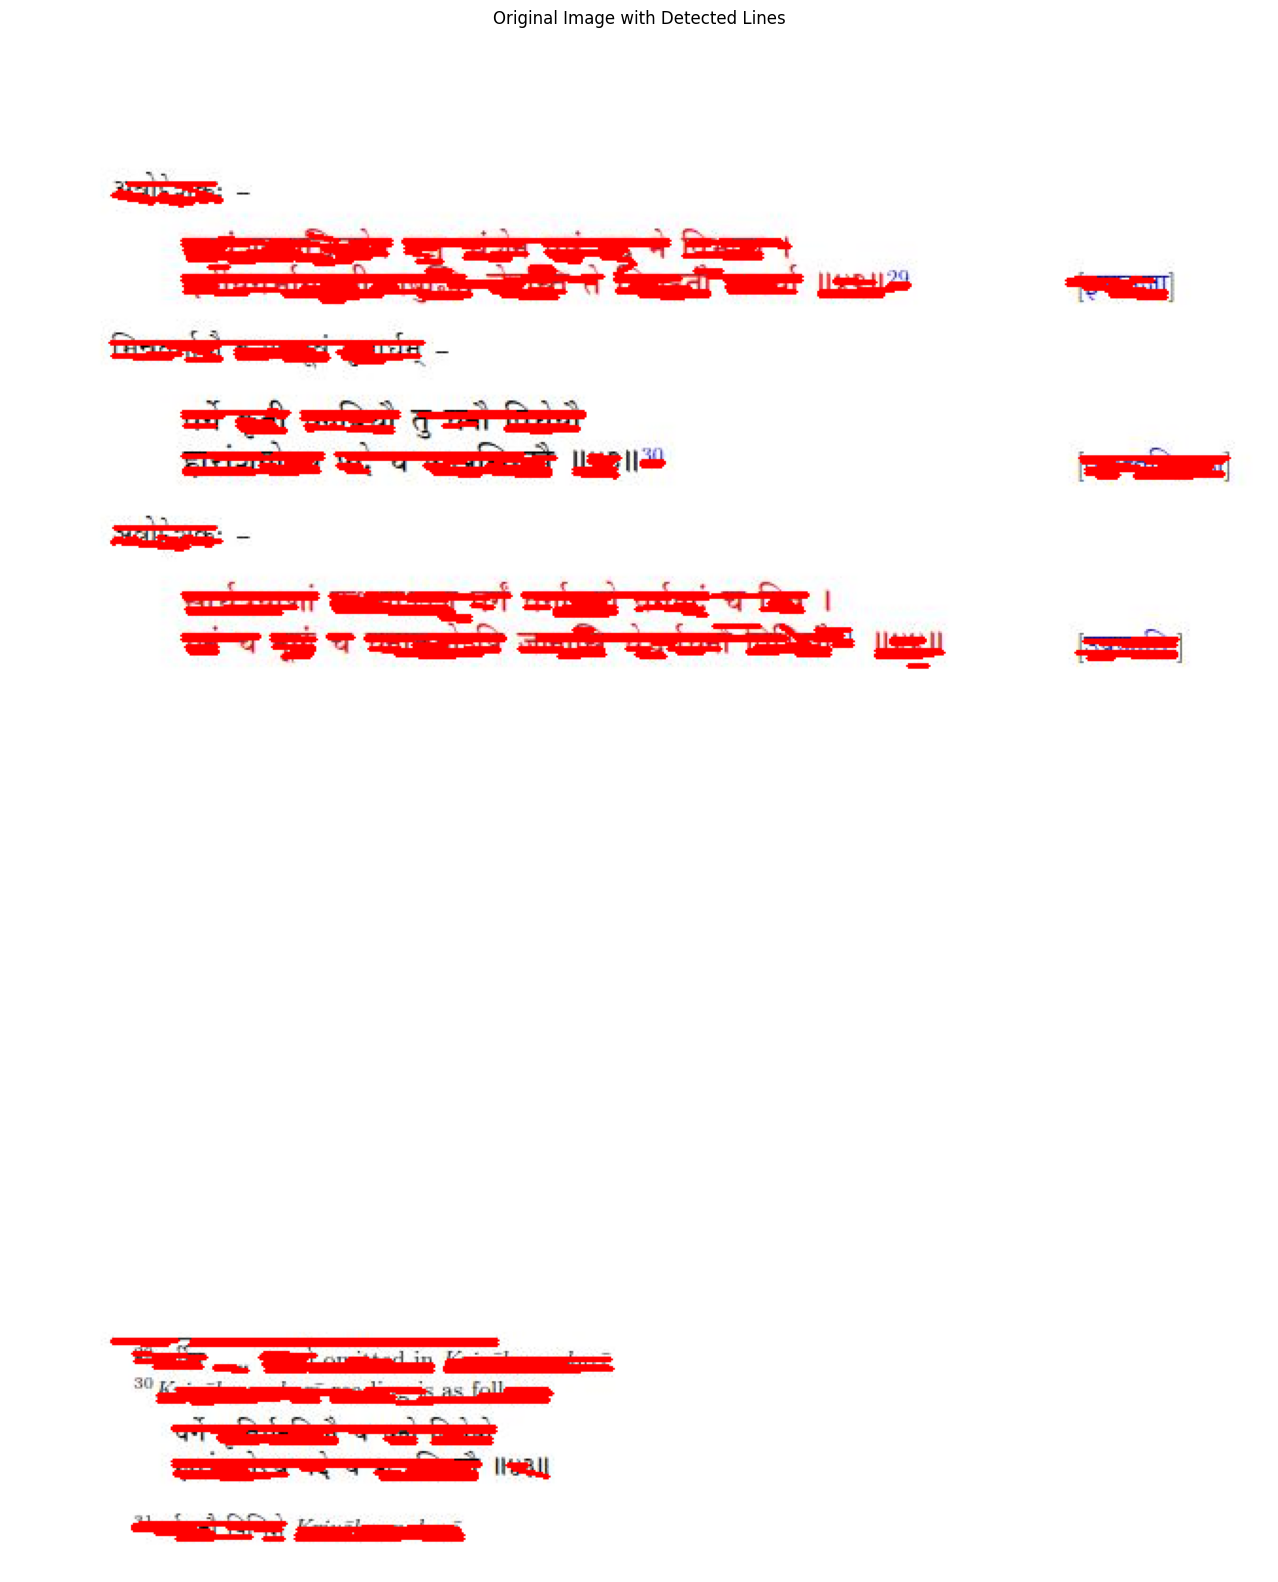

In [9]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, minLineLength=10, maxLineGap=5)

# Draw the lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Plot the image with detected lines
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Lines')
plt.axis('off')
plt.show()

In [19]:
lines_sorted = sorted(lines, key=lambda line: line[0][1])  # Sort lines based on y-coordinates
grouped_lines = []
current_group = [lines_sorted[0]]
for i in range(1, len(lines_sorted)):
    if abs(lines_sorted[i][0][1] - lines_sorted[i-1][0][1]) < 1:  # Tweak the threshold value for grouping
        current_group.append(lines_sorted[i])
    else:
        grouped_lines.append(current_group)
        current_group = [lines_sorted[i]]
grouped_lines.append(current_group)

In [20]:
for idx, line_group in enumerate(grouped_lines, start=1):
    min_x = min(line[0][0] for line in line_group)
    min_y = min(line[0][1] for line in line_group)
    max_x = max(line[0][2] for line in line_group)
    max_y = max(line[0][3] for line in line_group)
    cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)

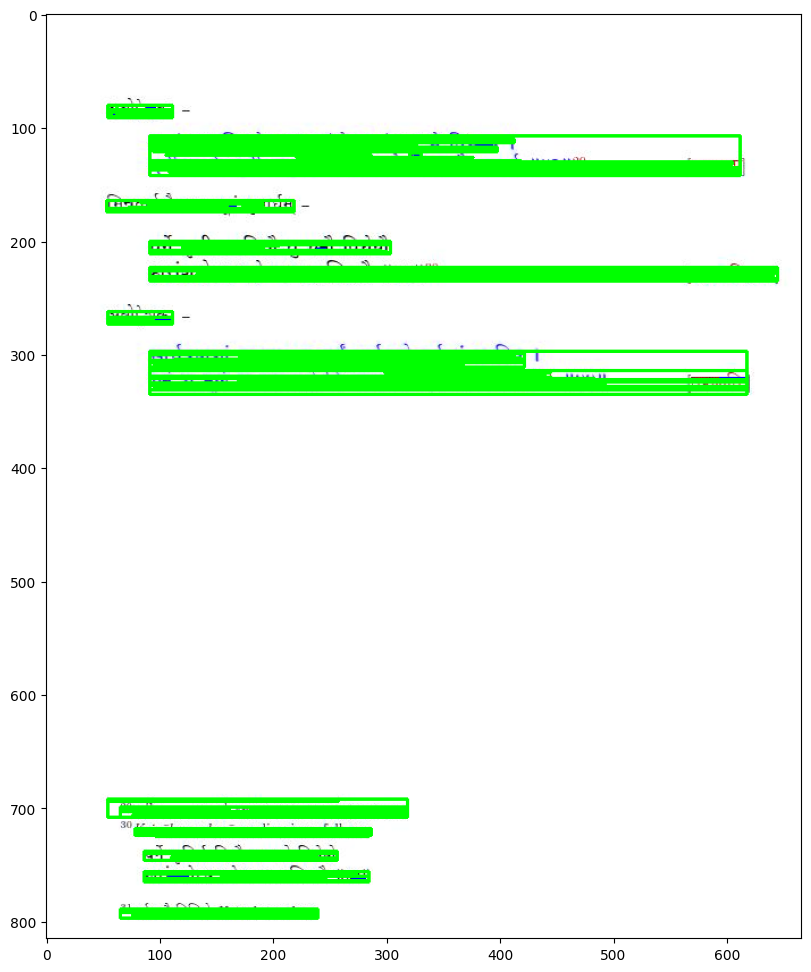

In [21]:
#plot image with bounding boxes
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()